<a href="https://colab.research.google.com/github/TimStep/QManifold/blob/main/QNNcircuit_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 988.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 13.3 MB/s eta 0:00:00


In [ ]:
#default imports
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#QML imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import QNNCircuit

In [ ]:
params = [[Parameter("input1"), Parameter("input2")],
           [Parameter("weight11"), Parameter("weight21")]]
inputs = algorithm_globals.random.random(2)
weights = algorithm_globals.random.random(2)

featuremap = QuantumCircuit(2)
ansatz = QuantumCircuit(2)

featuremap.rx(params[0][0], 0)
ansatz.rz(params[1][0], 0)
featuremap.rx(params[0][1], 1)
ansatz.rz(params[1][1], 1)

#featuremap.assign_parameters(inputs, inplace=True)
#ansatz.assign_parameters(weights, inplace=True)

qnn_qc = QNNCircuit(2, featuremap, ansatz)

print(qnn_qc)

     ┌────────────┐┌──────────────┐
q_0: ┤ Rx(input1) ├┤ Rz(weight11) ├
     ├────────────┤├──────────────┤
q_1: ┤ Rx(input2) ├┤ Rz(weight21) ├
     └────────────┘└──────────────┘


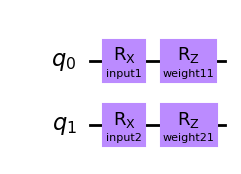

In [ ]:
params
qc1 = QuantumCircuit(2)
qc1.rx(params[0][0], 0)
qc1.rz(params[1][0], 0)
qc1.rx(params[0][1], 1)
qc1.rz(params[1][1], 1)
qc1.draw("mpl", style="clifford")

In [ ]:
observable1 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])
observable1

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])

In [ ]:
estimator_qnn = EstimatorQNN(
    circuit=qc1, observables=observable1, input_params=params[0], weight_params=params[1]
)

qc1.num_qubits, estimator_qnn.observables, estimator_qnn.output_shape

(2,
 (SparsePauliOp(['ZZ'],
                coeffs=[1.+0.j]),),
 (1,))

In [ ]:
estimator_qnn_forward = estimator_qnn.forward(inputs, weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.65293637]]. 
Shape: (1, 1)


In [ ]:
estimator_circuit = EstimatorQNN(
    circuit=qnn_qc, observables=observable1
)

print(estimator_circuit.circuit)

     ┌────────────┐┌──────────────┐
q_0: ┤ Rx(input1) ├┤ Rz(weight11) ├
     ├────────────┤├──────────────┤
q_1: ┤ Rx(input2) ├┤ Rz(weight21) ├
     └────────────┘└──────────────┘


In [ ]:
estimator_circuit_forward = estimator_circuit.forward(inputs, weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_circuit_forward}. \nShape: {estimator_circuit_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.65293637]]. 
Shape: (1, 1)


#Reassignment test

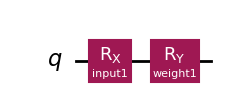

In [ ]:
inputs = [Parameter('input1')]
weights = [Parameter('weight1')]
qc = QuantumCircuit(1)
qc.rx(inputs[0], 0)
qc.ry(weights[0], 0)
#qc.measure_all()
qc.draw(output='mpl')

In [ ]:
p1 = [1, 2]
p2 = [3, 4]
qc.assign_parameters(p1, inplace=True)
qc.draw()

┌───────┐┌───────┐
q: ┤ Rx(1) ├┤ Ry(2) ├
   └───────┘└───────┘

In [ ]:
qc.assign_parameters(p2, inplace=True)
qc.draw()

ValueError: Mismatching number of values and parameters. For partial binding please pass a dictionary of {parameter: value} pairs.